# Gradient Descent From Scratch

Implementing all three variants:
1. Batch Gradient Descent
2. Stochastic Gradient Descent (SGD)
3. Mini-Batch Gradient Descent

We'll compare their behavior on the same problem.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import  FuncAnimation
from IPython.display import HTML

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)


---
## Setup: Generate Data

We'll use linear regression as our test problem.

In [2]:
# Generate data: y = 3x + 5 + noise
m = 1000  # Large dataset to see differences
X = 2 * np.random.rand(m, 1)
y = 5 + 3 * X + np.random.randn(m, 1)

# Add bias
X_b = np.c_[np.ones((m, 1)), X]

print(f'Dataset: {m} examples')
print(f'True parameters: θ₀ = 5, θ₁ = 3')


Dataset: 1000 examples
True parameters: θ₀ = 5, θ₁ = 3


---
## Implementation 1: Batch Gradient Descent

Uses ALL examples in each iteration.

In [3]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    cost_history = []
    theta_history = [theta.copy()]
    
    for iteration in range(n_iterations):
        # Compute gradient using ALL examples
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        
        # Update
        theta = theta - learning_rate * gradients
        
        # Track
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.copy())
    
    return theta, cost_history, theta_history

# Train
print('Training Batch Gradient Descent...')
theta_batch, cost_batch, theta_hist_batch = batch_gradient_descent(
    X_b, y, learning_rate=0.1, n_iterations=500
)
print(f'Final θ: {theta_batch.ravel()}')
print(f'Final cost: {cost_batch[-1]:.6f}')


Training Batch Gradient Descent...
Final θ: [5.17402153 2.9232581 ]
Final cost: 0.487484


---
## Implementation 2: Stochastic Gradient Descent

Uses ONE random example per iteration.

In [4]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=50):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    cost_history = []
    theta_history = [theta.copy()]
    
    for epoch in range(n_epochs):
        # Shuffle data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(m):
            # Use only ONE example
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            
            # Compute gradient for this example
            gradient = xi.T.dot(xi.dot(theta) - yi)
            
            # Update
            theta = theta - learning_rate * gradient
            
            # Track (compute cost on full dataset periodically)
            if i % 100 == 0:
                cost = compute_cost(X, y, theta)
                cost_history.append(cost)
                theta_history.append(theta.copy())
    
    return theta, cost_history, theta_history

# Train
print('Training Stochastic Gradient Descent...')
theta_sgd, cost_sgd, theta_hist_sgd = stochastic_gradient_descent(
    X_b, y, learning_rate=0.01, n_epochs=10
)
print(f'Final θ: {theta_sgd.ravel()}')
print(f'Final cost: {cost_sgd[-1]:.6f}')


Training Stochastic Gradient Descent...
Final θ: [5.11385302 2.86753585]
Final cost: 0.500650


---
## Implementation 3: Mini-Batch Gradient Descent

Uses small batches (e.g., 32 examples) per iteration.

In [5]:
def minibatch_gradient_descent(X, y, batch_size=32, learning_rate=0.1, n_epochs=50):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)
    cost_history = []
    theta_history = [theta.copy()]
    
    n_batches = m // batch_size
    
    for epoch in range(n_epochs):
        # Shuffle data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(n_batches):
            # Get mini-batch
            start = i * batch_size
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            
            # Compute gradient on batch
            gradients = (1/batch_size) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            
            # Update
            theta = theta - learning_rate * gradients
            
            # Track
            if i % 5 == 0:
                cost = compute_cost(X, y, theta)
                cost_history.append(cost)
                theta_history.append(theta.copy())
    
    return theta, cost_history, theta_history

# Train
print('Training Mini-Batch Gradient Descent...')
theta_minibatch, cost_minibatch, theta_hist_minibatch = minibatch_gradient_descent(
    X_b, y, batch_size=32, learning_rate=0.1, n_epochs=50
)
print(f'Final θ: {theta_minibatch.ravel()}')
print(f'Final cost: {cost_minibatch[-1]:.6f}')


Training Mini-Batch Gradient Descent...
Final θ: [5.11708923 2.8588684 ]
Final cost: 0.495399


---
## Comparison: Cost Over Time

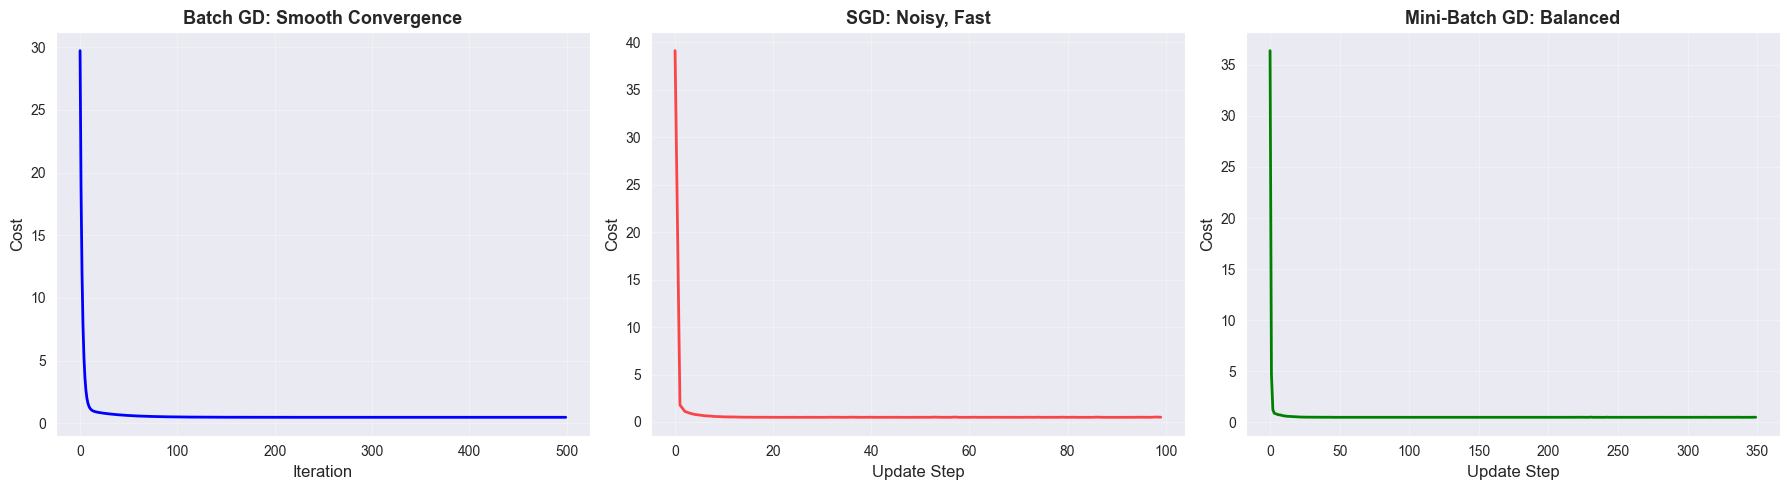

Batch GD final cost:      0.487484
SGD final cost:           0.500650
Mini-Batch GD final cost: 0.495399


In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Batch GD
axes[0].plot(cost_batch, linewidth=2, color='blue')
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('Cost', fontsize=12)
axes[0].set_title('Batch GD: Smooth Convergence', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# SGD
axes[1].plot(cost_sgd, linewidth=2, color='red', alpha=0.7)
axes[1].set_xlabel('Update Step', fontsize=12)
axes[1].set_ylabel('Cost', fontsize=12)
axes[1].set_title('SGD: Noisy, Fast', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Mini-Batch
axes[2].plot(cost_minibatch, linewidth=2, color='green')
axes[2].set_xlabel('Update Step', fontsize=12)
axes[2].set_ylabel('Cost', fontsize=12)
axes[2].set_title('Mini-Batch GD: Balanced', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Batch GD final cost:      {cost_batch[-1]:.6f}')
print(f'SGD final cost:           {cost_sgd[-1]:.6f}')
print(f'Mini-Batch GD final cost: {cost_minibatch[-1]:.6f}')


---
## Comparison: Convergence Path in Parameter Space

C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


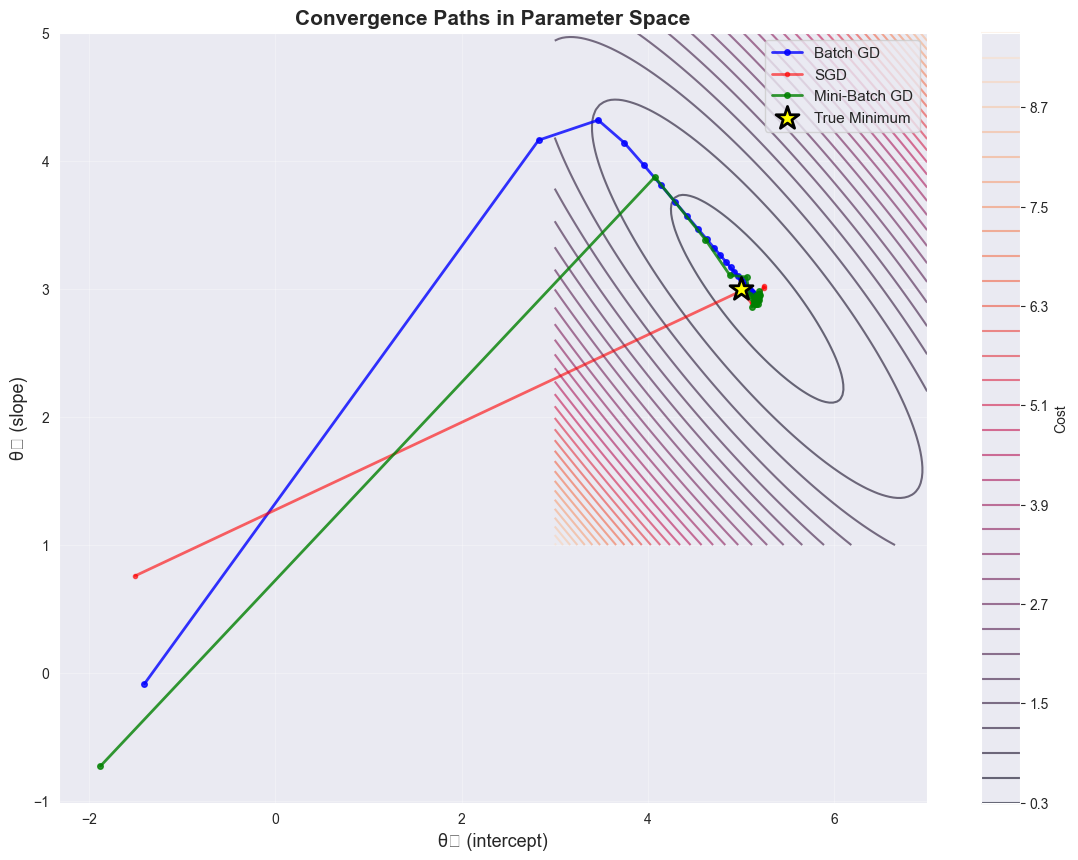

In [7]:
# Create cost surface
theta0_vals = np.linspace(3, 7, 100)
theta1_vals = np.linspace(1, 5, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

J_vals = np.zeros(theta0_grid.shape)
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta_test = np.array([[theta0_grid[j, i]], [theta1_grid[j, i]]])
        J_vals[j, i] = compute_cost(X_b, y, theta_test)

# Plot
plt.figure(figsize=(14, 10))

# Contour
plt.contour(theta0_grid, theta1_grid, J_vals, levels=30, alpha=0.6)
plt.colorbar(label='Cost')

# Plot paths (subsample for clarity)
batch_path = np.array(theta_hist_batch)[::10]
sgd_path = np.array(theta_hist_sgd)[::20]
minibatch_path = np.array(theta_hist_minibatch)[::10]

plt.plot(batch_path[:, 0], batch_path[:, 1], 'b-o', 
        linewidth=2, markersize=4, label='Batch GD', alpha=0.8)
plt.plot(sgd_path[:, 0], sgd_path[:, 1], 'r-o', 
        linewidth=2, markersize=3, label='SGD', alpha=0.6)
plt.plot(minibatch_path[:, 0], minibatch_path[:, 1], 'g-o', 
        linewidth=2, markersize=4, label='Mini-Batch GD', alpha=0.8)

# Mark optimum
plt.scatter([5], [3], color='yellow', s=300, marker='*', 
           edgecolors='black', linewidths=2, label='True Minimum', zorder=10)

plt.xlabel('θ₀ (intercept)', fontsize=13)
plt.ylabel('θ₁ (slope)', fontsize=13)
plt.title('Convergence Paths in Parameter Space', fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()


---
## Summary

### Observed Behavior:

**Batch Gradient Descent:**
- Smooth, direct path to minimum
- Predictable convergence
- Slowest (500 iterations for full dataset each time)

**Stochastic Gradient Descent:**
- Very noisy path, oscillates
- Fast updates (see improvements quickly)
- Never settles exactly at minimum

**Mini-Batch Gradient Descent:**
- Moderately smooth path
- Good balance of speed and stability
- Industry standard (PyTorch default)

### Key Insights:

1. **Batch GD** is great for theory and small datasets
2. **SGD** is necessary for huge datasets and online learning
3. **Mini-Batch** is the practical choice for almost everything
4. All three converge to approximately the same solution
5. Noise in SGD can help escape local minima

### Interview Answer:

"For modern deep learning, I'd use mini-batch gradient descent with batch size 32-128. It's GPU-efficient, converges well, and is the industry standard. For huge datasets that don't fit in memory, I'd use SGD. Batch GD is only for educational purposes or very small datasets."